## Dynamic Time Warping(DTW) Algorithm in Time Series

In [1]:
pip install fastdtw

  Using cached https://files.pythonhosted.org/packages/99/43/30f2d8db076f216b15c10db663b46e22d1750b1ebacd7af6e62b83d6ab98/fastdtw-0.3.4.tar.gz
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp37-none-any.whl size=3594 sha256=8d275fb8da5304aa26d8f80f7ef7b55847c4b8daae9834f8ee227954172e8404
  Stored in directory: C:\Users\jmoln\AppData\Local\pip\Cache\wheels\7e\95\df\935f19af51d6ab63d416c103c0d6eae7048a8c2ecb00a1497f
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")


# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [3]:
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist

In [4]:
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
        
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
            
    return cost

In [47]:
# Create two sequences
x = [7, 1, 2, 5, 9]
y = [1, 8, 0, 4, 4, 2, 0]

end_eff_raw = pd.read_csv(r'C:\Users\jmoln\AppData\LocalLow\DefaultCompany\NonAnthroHandsUserStudy\j2s6s300_end_effectorMotion_1.csv')
end_eff_data = end_eff_raw.to_numpy()
end_eff_posX = end_eff_data[...,1]
#print (end_eff_posX)

#print (data)
#df = pd.DataFrame(data, columns=['Position'])

link6_raw = pd.read_csv(r'C:\Users\jmoln\AppData\LocalLow\DefaultCompany\NonAnthroHandsUserStudy\j2s6s300_link_6Motion_1.csv')
link6_data = link6_raw.to_numpy()
link6_posX = link6_data[...,1]
#print (link6_posX)

x = end_eff_posX
y = link6_posX

Text(0.5, 1.0, 'Euclidean Distance')

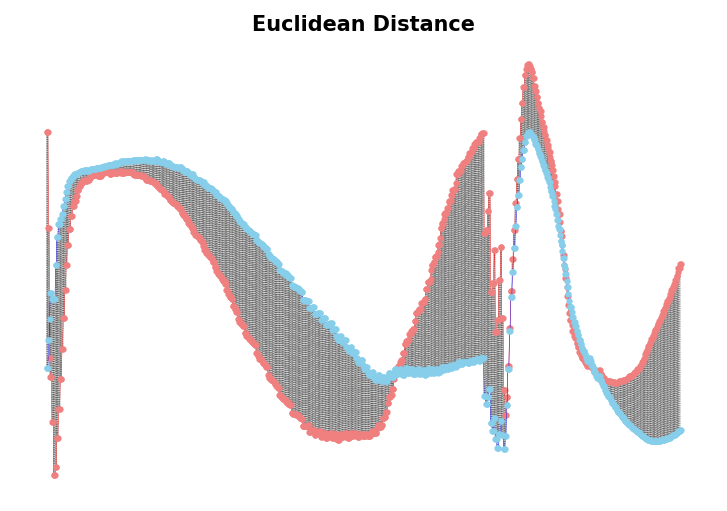

In [48]:
fig, ax = plt.subplots(figsize=(6, 4))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=0.2)

ax.plot(x, '-ro', label='x', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("Euclidean Distance", fontsize=10, fontweight="bold")


In [49]:
dtw_distance, warp_path = fastdtw(x, y, dist=euclidean) 

In [37]:
warp_path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 1),
 (5, 2),
 (6, 3),
 (7, 4),
 (8, 5),
 (9, 5),
 (10, 6),
 (11, 7),
 (12, 7),
 (13, 8),
 (14, 8),
 (15, 8),
 (16, 9),
 (17, 10),
 (18, 11),
 (19, 12),
 (20, 13),
 (20, 14),
 (20, 15),
 (20, 16),
 (20, 17),
 (20, 18),
 (20, 19),
 (20, 20),
 (20, 21),
 (20, 22),
 (20, 23),
 (20, 24),
 (20, 25),
 (20, 26),
 (20, 27),
 (20, 28),
 (20, 29),
 (20, 30),
 (20, 31),
 (20, 32),
 (20, 33),
 (20, 34),
 (20, 35),
 (20, 36),
 (20, 37),
 (20, 38),
 (20, 39),
 (20, 40),
 (20, 41),
 (20, 42),
 (20, 43),
 (20, 44),
 (20, 45),
 (21, 46),
 (22, 46),
 (23, 46),
 (24, 46),
 (25, 47),
 (26, 48),
 (27, 49),
 (28, 50),
 (29, 51),
 (30, 52),
 (31, 52),
 (32, 52),
 (33, 53),
 (34, 53),
 (35, 54),
 (36, 54),
 (37, 55),
 (38, 56),
 (39, 57),
 (40, 58),
 (41, 59),
 (42, 60),
 (43, 61),
 (44, 62),
 (45, 62),
 (46, 63),
 (47, 64),
 (48, 65),
 (48, 66),
 (49, 67),
 (50, 68),
 (51, 69),
 (52, 70),
 (52, 71),
 (53, 72),
 (54, 73),
 (55, 74),
 (55, 75),
 (56, 76),
 (56, 77),
 (57

In [50]:
dtw_distance

16.93179092973999

In [51]:
cost_matrix = compute_accumulated_cost_matrix(x, y)


In [56]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sbn.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()

# Get the warp path in x and y directions
path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000023F5FF5F678> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023F60034A68> (for post_execute):


KeyboardInterrupt: 

In [ ]:
ax.plot(path_xx, path_yy, color='blue', linewidth=0.1, alpha=0.2)

In [53]:
print("DTW distance: ", dtw_distance)
print("Warp path: ", warp_path)

DTW distance:  16.93179092973999
Warp path:  [(0, 0), (1, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 3), (27, 4), (28, 5), (29, 5), (30, 5), (31, 6), (32, 7), (32, 8), (32, 9), (32, 10), (32, 11), (32, 12), (32, 13), (32, 14), (33, 15), (34, 16), (35, 17), (36, 18), (37, 19), (38, 20), (39, 21), (40, 22), (41, 23), (42, 24), (43, 25), (43, 26), (43, 27), (44, 28), (45, 29), (46, 30), (47, 31), (48, 32), (49, 32), (50, 32), (51, 32), (52, 33), (53, 34), (54, 34), (55, 35), (56, 36), (57, 37), (58, 38), (59, 39), (60, 40), (61, 40), (62, 40), (63, 40), (64, 40), (65, 40), (66, 40), (67, 40), (68, 40), (69, 40), (70, 40), (71, 40), (72, 41), (73, 42), (74, 43), (75, 44), (76, 45), (77, 46), (78, 46), (79, 46), (80, 46), (81, 46), (82, 46), (83, 46), (84, 46), (85, 46), (86, 46), (87, 46), (88, 46), (89, 46), (90, 46),

In [54]:
cost_matrix = compute_accumulated_cost_matrix(x, y)
print(np.flipud(cost_matrix)) # Flipping the cost matrix for easier comparison with heatmap values!


[[15.33900025 15.33900025 15.33900025 ...  0.91330177  0.92430778
   0.93531231]
 [15.30247451 15.30247451 15.30247451 ...  0.9130035   0.92400803
   0.93501872]
 [15.26594878 15.26594878 15.26594878 ...  0.91270376  0.92371445
   0.93471677]
 ...
 [ 0.06911658  0.06911658  0.06911658 ...  7.27762975  7.28211742
   7.28660509]
 [ 0.04607772  0.04607772  0.06911658 ...  7.27762975  7.28211742
   7.28660509]
 [ 0.02303886  0.04607772  0.06911658 ...  7.27762975  7.28211742
   7.28660509]]


Text(0.5, 1.0, 'DTW Distance')

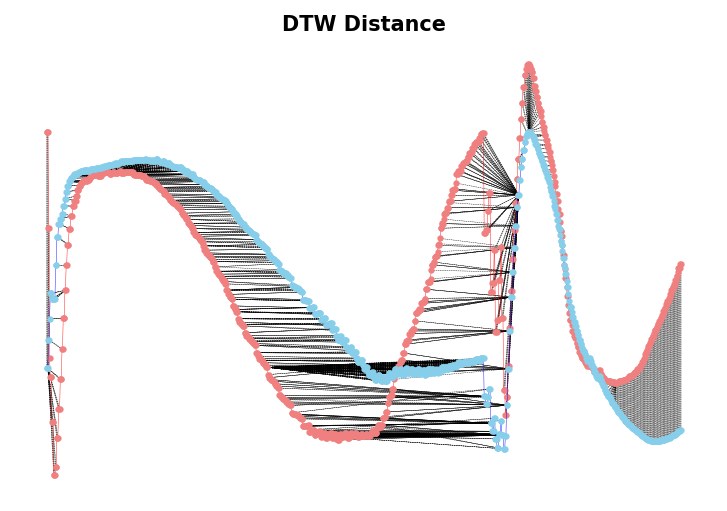

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=0.2)

ax.plot(x, '-ro', label='x', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')

ax.set_title("DTW Distance", fontsize=10, fontweight="bold")
